# 形态学转换
- 腐蚀
- 膨胀
- 开运算
- 闭运算
- 形态梯度
- Top Hat
- Black Hat

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## 形态学转换

主要包括腐蚀、膨胀、开运算、闭运算等操作；主要操作是基于 kernel 核的操作<br/>
常见的核主要有：矩阵、十字架、椭圆结构的 kernel<br/>
它决定了形态学操作（如腐蚀、膨胀）的邻域形状和大小，它和卷积核在数学本质、用途和计算方式上完全不同

形态学转换见：http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm

In [2]:
# 生成形态学操作的结构元素——核
kernel1 = cv.getStructuringElement(cv.MORPH_RECT, ksize=(5, 5))
print("矩形kernel:\n", kernel1, sep="")

kernel2 = cv.getStructuringElement(cv.MORPH_CROSS, ksize=(5, 5))
print("\n十字架kernel:\n", kernel2, sep="")

kernel3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, ksize=(5, 5))
print("\n椭圆kernel:\n", kernel3, sep="")

矩形kernel:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

十字架kernel:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]

椭圆kernel:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


### 腐蚀
腐蚀的意思是将边缘的像素点进行一些去除的操作；<br>
1. 滑动内核：将内核的中心（称为锚点，默认是中心点）对准输入图像上的每一个像素。
2. 计算最小值：查看内核所覆盖的输入图像区域，取出这个区域内所有像素值的最小值。
3. 替换锚点像素：用这个计算出的最小值来替换输出图像中锚点位置的像素值。

其主要效果是：可以在图像中减少前景图像（白色区域）的厚度，有助于减少白色噪声，可以用于分离两个连接的对象<br/>
一般应用与只有黑白像素的灰度情况

In [3]:
# 加载灰度图
img = cv.imread("./images/j.png", cv.IMREAD_GRAYSCALE)

In [4]:
# 进行腐蚀操作
# a. 定义一个核（全部设置为 1 表示对核中 5*5 区域的所有像素均进行考虑，设置为 0 表示不考虑）
# 核的定义和卷积不一样，卷积里面是参数的意思，腐蚀里面是范围的意思（1 表示考虑，0 表示不考虑） 
kernel = np.ones((5, 5), np.uint8)

# b. 腐蚀操作
# iterations=1：腐蚀操作的迭代次数，值越大，腐蚀效果越强
dst = cv.erode(img, kernel, iterations=1)

# c. 可视化
cv.imshow('img', img)
cv.imshow('dst', dst)  # 腐蚀操作
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
# 进行腐蚀操作
# a. 定义一个核：十字架（设置为 1 表示考虑，设置为 0 表示不考虑）
kernel = cv.getStructuringElement(cv.MORPH_CROSS, ksize=(5, 5))

# b. 腐蚀操作
# morphologyEx 函数与直接调用 cv.erode() 功能类似，但通过更通用的形态学操作接口实现
dst = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)

# c. 可视化
cv.imshow('img', img)
cv.imshow('dst', dst)  # 十字架腐蚀
cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
kernel

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### 膨胀
和腐蚀的操作相反，其功能是增加图像的白色区域的值；<br>
1. 滑动内核：将内核的中心（锚点，默认是中心点）对准输入图像上的每一个像素。
2. 计算最大值：查看内核所覆盖的输入图像区域，取出这个区域内所有像素值的最大值。
3. 替换锚点像素：用这个计算出的最大值来替换输出图像中锚点位置的像素值。

通常情况下，在去除噪声后，可以通过膨胀再恢复图像的目标区域信息。

In [6]:
# 加载灰度图
img = cv.imread("./images/j.png", 0)

In [7]:
# 进行膨胀操作
# a. 定义一个核
kernel = np.ones((5, 5), np.uint8)

# b. 膨胀操作
dst = cv.dilate(img, kernel, iterations=1)

# c. 可视化
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
# 进行膨胀操作
# a. 定义一个核：十字架
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

# b. 膨胀操作
# morphologyEx 函数与直接调用 cv.erode() 功能类似
dst = cv.morphologyEx(img, cv.MORPH_DILATE, kernel)

# c. 可视化
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

### Open 开运算
Open 其实指的就是先做一次腐蚀，然后再做一次膨胀操作，一般用于去除白色噪声。

In [9]:
# 加载灰度图
img = cv.imread("./images/j.png", 0)

# 加载噪声数据
rows, cols = img.shape
for i in range(100):
    # 从[0, cols)中抽取的随机整数
    x = np.random.randint(cols)  
    y = np.random.randint(rows)
    # 在随机的点[列坐标, 行坐标]，填充白色
    img[y, x] = 255

In [10]:
# c. 可视化
cv.imshow('img', img)  # 加白色噪声
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
# a. 定义一个核
kernel = np.ones((5, 5), np.uint8)

# b. Open操作：去除白色噪声
dst = cv.morphologyEx(img, op=cv.MORPH_OPEN, kernel=kernel, iterations=1)

# c. 可视化
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
# a. 定义一个核
kernel = np.ones((5, 5), np.uint8)

# b. 先腐蚀
dst1 = cv.erode(img, kernel, iterations=1)

# c. 再膨胀
dst2 = cv.dilate(dst1, kernel, iterations=1)

# d. 可视化
cv.imshow('img', img)
cv.imshow('dst1', dst1)  # 腐蚀：去除白色噪声
cv.imshow('dst2', dst2)  # 膨胀
cv.waitKey(0)
cv.destroyAllWindows()

### Closing 闭运算
Closing 其实指的就是先做一次膨胀，再做一次腐蚀；<br>
对前景图像中的如果包含黑色点，有一共去除的效果。

In [14]:
# 加载灰度图
img = cv.imread("./images/j.png", 0)

# 加载噪声数据
rows, cols = img.shape
# 加白色点
for i in range(100):
    x = np.random.randint(cols)
    y = np.random.randint(rows)
    img[y, x] = 255
    
# 加黑色点
for i in range(1000):
    x = np.random.randint(cols)
    y = np.random.randint(rows)
    img[y, x] = 0

In [15]:
# c. 可视化
cv.imshow('img', img)  # 加黑白噪声
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
# a. 定义一个核
kernel = np.ones((5, 5), np.uint8)

# b. Closing操作：去除黑色噪声
dst = cv.morphologyEx(img, op=cv.MORPH_CLOSE, kernel=kernel, iterations=1)

# c. 可视化
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [17]:
# a. 定义一个核
kernel = np.ones((5,5), np.uint8)

# b. 先膨胀
dst1 = cv.dilate(img, kernel, iterations=1)

# c. 再腐蚀
dst2 = cv.erode(dst1, kernel, iterations=1)

# d. 可视化
cv.imshow('img', img)
cv.imshow('dst1', dst1)  # 膨胀：去除黑色噪声
cv.imshow('dst2', dst2)  # 腐蚀
cv.waitKey(0)
cv.destroyAllWindows()

In [18]:
# a. 定义一个核
kernel = np.ones((5, 5), np.uint8)

# b. 先 Closing 操作，再 Open 操作
dst1 = cv.morphologyEx(img, op=cv.MORPH_CLOSE, kernel=kernel, iterations=1)
dst2 = cv.morphologyEx(dst1, op=cv.MORPH_OPEN, kernel=kernel, iterations=1)

# c. 可视化
cv.imshow('img', img)
cv.imshow('dst1', dst1)  # Closing 后的图像：去除黑色噪声
cv.imshow('dst2', dst2)  # Open 后的图像：去除白色噪声
cv.waitKey(0)
cv.destroyAllWindows()

### Morphological Gradient 形态梯度
就是在膨胀和腐蚀之间的操作，也就是在膨胀的图像和腐蚀的图像之间取差集，<br>
一般的结果就是边缘位置显示，其他位置不显示（类似提取边缘，但不是）；

一般做这个之前，先做一个噪声数据去除的操作。

In [20]:
# NOTE：深度学习的特征提取都不建议人来参与，而是由模型自己决定

# 加载灰度图
# img = cv.imread("./images/j.png", 0)
img = cv.imread("./images/xiaoren.png", 0)

# a. 定义一个核
kernel = np.ones((5, 5), np.uint8)

# b. 形态梯度 (dilate - erode)
dst1 = cv.morphologyEx(img, op=cv.MORPH_DILATE, kernel=kernel, iterations=1)    # 膨胀
dst2 = cv.morphologyEx(img, op=cv.MORPH_ERODE, kernel=kernel, iterations=1)     # 腐蚀
dst3 = cv.morphologyEx(img, op=cv.MORPH_GRADIENT, kernel=kernel, iterations=1)  # 形态梯度

# c. 可视化
cv.imshow('dst1', dst1)  # 膨胀后图像
cv.imshow('dst2', dst2)  # 腐蚀后图像
cv.imshow('dst3', dst3)  # 形态梯度后图像
cv.waitKey(0)
cv.destroyAllWindows()

### Top Hat
在原始图像和Open图像之间获取差集，提取一些非交叉点的信息。一般不用。

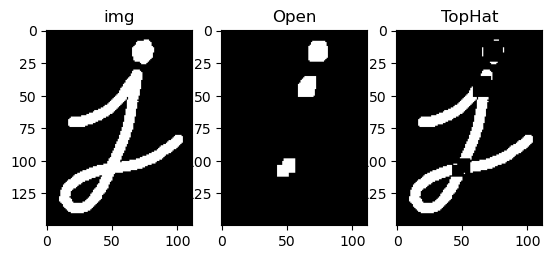

In [13]:
# 加载灰度图
img = cv.imread("./images/j.png", 0)

# a. 定义一个核
# kernel = np.ones((5, 5), np.uint8)
kernel = np.ones((9, 9), np.uint8)  # 核变大了

# b. Open（先腐蚀，再膨胀）
dst1 = cv.morphologyEx(img, op=cv.MORPH_OPEN, kernel=kernel, iterations=1)

# c. Top Hat(原始图 - open图)
# dst2 = img - dst1
dst2 = cv.morphologyEx(img, op=cv.MORPH_TOPHAT, kernel=kernel, iterations=1)

# 可视化
plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('img')

plt.subplot(132)
plt.imshow(dst1, 'gray')  # Open 后图像
plt.title('Open')

plt.subplot(133)
plt.imshow(dst2, 'gray')  # Top Hat 后图像
plt.title('TopHat')
plt.show()

### Black Hat
在原始图像和 Close 操作图像之间取差集，提取一些交叉点附近的特征信息。一般不用。

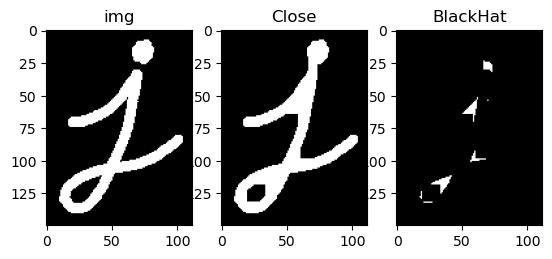

In [40]:
# 加载灰度图
img = cv.imread("./images/j.png", 0)

# a. 定义一个核
kernel = np.ones((9, 9), np.uint8)

# b. Close(先膨胀，再腐蚀)
dst1 = cv.morphologyEx(img, op=cv.MORPH_CLOSE, kernel=kernel, iterations=1)

# c. Black Hat(close图 - 原始图)
# dst2 = dst1 - img
dst2 = cv.morphologyEx(img, op=cv.MORPH_BLACKHAT, kernel=kernel, iterations=1)

# 可视化
plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('img')

plt.subplot(132)
plt.imshow(dst1, 'gray')  # close 后图像
plt.title('Close')

plt.subplot(133)
plt.imshow(dst2, 'gray')  # Black Hat 后图像
plt.title('BlackHat')
plt.show()

In [4]:
"""处理车牌图像"""

img0 = cv.imread("./images/car.jpg")         # 加载图像
img0 = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)  # 转成灰度图
img = cv.GaussianBlur(img0, (5, 5), 0)       # 高斯模糊（0：根据 ksize 自动计算标准差）
# img = img0  # 不做平滑，噪声点就会保留下来

# a. 定义一个核
kernel = np.ones((5, 5), np.uint8)

# b. 形态梯度(dilate - erode)，显示边缘位置
img1 = cv.morphologyEx(img, op=cv.MORPH_GRADIENT, kernel=kernel, iterations=1)

# 二值化处理
ret, img2 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY)

# 膨胀操作
# 这是一个扁平的水平核，表示膨胀操作将沿着水平方向进行
kernel = np.asarray([
    [1, 1, 1, 1, 1, 1, 1, 1]
])
img3 = cv.dilate(img2, kernel, iterations=4)

# 可视化
cv.imshow('img0', img0)  # 原图
cv.imshow('img', img)    # 高斯模糊
cv.imshow('img1', img1)  # 形态梯度
cv.imshow('img2', img2)  # 二值化
cv.imshow('img3', img3)  # 膨胀后，出现矩形，以便后续提取矩形
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
# NOTE：OpenCV用什么方法，要根据具体的场景、具体的问题，它的泛化能力比较差

img0 = cv.imread("./images/car3.jpg")        # 加载图像
img0 = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)  # 转成灰度图
img = cv.GaussianBlur(img0, (5, 5), 0)       # 高斯模糊（0：根据 ksize 自动计算标准差）

# a. 定义一个核
kernel = np.ones((5, 5), np.uint8)

# b. 形态梯度(dilate - erode)，显示边缘位置
img1 = cv.morphologyEx(img, op=cv.MORPH_GRADIENT, kernel=kernel, iterations=1)

# 二值化处理
ret, img2 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY)

# 膨胀腐蚀的相关操作
kernel = np.asarray([
    [1, 1, 1, 1, 1, 1, 1, 1]
])
img3 = cv.dilate(img2, kernel, iterations=10)  # 膨胀的 kernel 可以和腐蚀的不一样
img4 = cv.erode(img3, kernel, iterations=3)    # 腐蚀

cv.imshow('img0', img0)  # 原图
cv.imshow('img', img)    # 高斯模糊
cv.imshow('img1', img1)  # 形态梯度
cv.imshow('img2', img2)  # 二值化
cv.imshow('img3', img3)  # 膨胀腐蚀后，出现矩形，以便后续提取矩形
cv.waitKey(0)
cv.destroyAllWindows()